<a href="https://colab.research.google.com/github/JulianaDamurie/AprendizagemDeMaquina/blob/main/one_class_jm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# import
import time
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import KFold, StratifiedKFold
import math
import scipy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
from past.builtins import xrange
from collections import OrderedDict
from sklearn.utils import shuffle

In [27]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def fit_distance(self, X_test,k):
        final_output = []
        distances =  scipy.spatial.distance.cdist( self.X_train , X_test, 'euclidean')
        distances_win = []
        X_win = []

        for i in range(len(X_test)):
            d = []
            votes = []
            d_individuals = []
            x_individuals = []
            for j in range(len(self.X_train)):
                dist = np.absolute(distances[j][i])
                d.append([dist, j])
            d.sort()
            d = d[0:k]
            for d, j in d:
                votes.append(self.y_train[j])
                d_individuals.append(d)
                x_individuals.append(self.X_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            distances_win.append(d_individuals)
            X_win.append(x_individuals)
        return distances_win,X_win
    
    def predict(self,X_test,epsilon,k):
      final_output = []
      distances, x_win = self.fit_distance(X_test,k)

      for i in range(len(X_test)):
        d_intra, x_intra = self.fit_distance(x_win[i],2)

        calculate = distances[i][0]/(d_intra[0][1] + 0.0000000000000001)
        
        if (calculate<epsilon):
          final_output.append("false")
        else:
          final_output.append("true")
      return final_output
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)


In [28]:
class KNN_modified:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def fit_distance(self, X_test,k):
        final_output = []
        distances =  scipy.spatial.distance.cdist( self.X_train , X_test, 'euclidean')
        distances_win = []
        X_win = []

        for i in range(len(X_test)):
            d = []
            votes = []
            d_individuals = []
            x_individuals = []
            for j in range(len(self.X_train)):
                dist = np.absolute(distances[j][i])
                d.append([dist, j])
            d.sort()
            d = d[0:k]
            for d, j in d:
                votes.append(self.y_train[j])
                d_individuals.append(d)
                x_individuals.append(self.X_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            distances_win.append(d_individuals)
            X_win.append(x_individuals)
        return distances_win,X_win
    
    def predict(self,X_test,epsilon,k):
      final_output = []
      distances, x_win = self.fit_distance(X_test,k)
      for i in range(len(X_test)):
        d_intra, x_intra = self.fit_distance(x_win[i],2)

        sum_dist_intra = 0
        sum_dist_z = 0

        for j in range(len(d_intra)):
          sum_dist_intra += d_intra[j][1]
          sum_dist_z += distances[i][j]

        calculate = sum_dist_z/(sum_dist_intra + 0.0000000000000001)
        

        if (calculate<(epsilon*k)):
          final_output.append("false")
        else:
          final_output.append("true")
      return final_output
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)


In [29]:
def sample_first_prows(data, perc):
    import pandas as pd
    return data.head(int(len(data)*(perc)))

def sample_last_prows(data, perc):
    import pandas as pd
    return data.tail(int(len(data)*(perc)))

In [30]:
# read first data set
dataset = True

if dataset:
  data, meta = arff.loadarff('/content/jm1.arff')

  df1 = pd.DataFrame(data)

  df1["defects"] = df1["defects"].astype(str).str.replace("b","")
  df1["defects"] = df1["defects"].astype(str).str.replace("'","")
  y_label = "defects"
else:
  data, meta = arff.loadarff('/content/kc2.arff')

  df1 = pd.DataFrame(data)

  df1["problems"] = df1["problems"].astype(str).str.replace("b","")
  df1["problems"] = df1["problems"].astype(str).str.replace("'","")
  df1["problems"] = df1["problems"].astype(str).str.replace("yes","true")
  df1["problems"] = df1["problems"].astype(str).str.replace("no","false")
  y_label = "problems"
df1 = df1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

df1

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,false
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,true
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51.0,10.0,8.0,1.0,17.0,36.0,112.0,86.0,13.0,true
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129.0,29.0,28.0,2.0,17.0,135.0,329.0,271.0,5.0,true
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28.0,1.0,6.0,0.0,11.0,16.0,76.0,50.0,7.0,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,0.08,98.38,13.0,0.0,2.0,0.0,10.0,15.0,30.0,22.0,7.0,false
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,0.04,59.43,5.0,0.0,2.0,0.0,12.0,8.0,19.0,11.0,3.0,false
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,0.17,762.04,29.0,1.0,10.0,0.0,18.0,15.0,59.0,44.0,7.0,false
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,0.05,68.98,6.0,0.0,2.0,0.0,9.0,8.0,21.0,15.0,1.0,false


In [31]:
def separar_dados(df1,classe,percent):
  if(classe=='true'):
    n_classe = 'false'
  else:
    n_classe = 'true'
  scaler = StandardScaler()
  scaler.fit(df1.iloc[:, :-1])

  df_true = df1[df1[y_label].str.contains(classe, regex=False)]

  df_true.iloc[:, :-1] = scaler.transform(df_true.iloc[:, :-1])

  df_true = shuffle(df_true)

  df_false = df1[df1[y_label].str.contains(n_classe, regex=False)]

  df_false.iloc[:, :-1] = scaler.transform(df_false.iloc[:, :-1])

  df_false = shuffle(df_false)


  df_percent_false = sample_first_prows(df_false,percent)

  df_percent_false_test= sample_last_prows(df_false,1-percent)

  # divide into x_train, y_train, x_test and y_test

  df_test = pd.concat([df_percent_false_test,df_true])
  df_test = shuffle(df_test)

  x_df1 = np.array(df_false.iloc[:, :-1].values)
  y_df1 = np.array(df_false.iloc[:, 21].values)

  x_df2 = np.array(df_test.iloc[:, :-1].values)
  y_df2 = np.array(df_test.iloc[:, 21].values)

  return x_df1,y_df1,x_df2,y_df2

In [32]:
skf = StratifiedKFold(n_splits=5,shuffle=True)

In [33]:
list_percent = [0.3,0.4,0.5]
acc_peso = {}


for percent in list_percent:
  x_df1,y_df1,x_df2,y_df2 = separar_dados(df1,'true',percent)

  k = 1
  i = 0
  sum = 0 
  recall_true = 0
  recall_false = 0
  f1_true = 0
  precision_true = 0
  precision_false = 0
  f1_false = 0
  tn_sum =0
  fp_sum=0
  fn_sum=0
  tp_sum = 0
  tempo_init = time.time()


  for train_index, test_index in  skf.split(x_df2,y_df2):
    xdf1_test = x_df2[test_index]
    ydf1_test = y_df2[test_index]

    classifier = KNN(k)  
    classifier.fit(x_df1, y_df1) 

    tempo_treino = time.time() - tempo_init 
    tempo_init = time.time()

    ydf1_pred = classifier.predict(xdf1_test,1,k)

    tn, fp, fn, tp = confusion_matrix(ydf1_test, ydf1_pred).ravel() 


    tn_sum += tn
    fp_sum += fp
    fn_sum += fn
    tp_sum += tp

    sum += classification_report(ydf1_test, ydf1_pred,output_dict=True)['accuracy'] 
    recall_true += classification_report(ydf1_test, ydf1_pred,output_dict=True)['true']['recall']
    precision_true += classification_report(ydf1_test, ydf1_pred,output_dict=True)['true']['precision']
    f1_true += classification_report(ydf1_test, ydf1_pred,output_dict=True)['true']['f1-score']

    recall_false += classification_report(ydf1_test, ydf1_pred,output_dict=True)['false']['recall']
    precision_false += classification_report(ydf1_test, ydf1_pred,output_dict=True)['false']['precision']
    f1_false += classification_report(ydf1_test, ydf1_pred,output_dict=True)['false']['f1-score']


    print("k------",k,i)
    print(classification_report(ydf1_test, ydf1_pred))
    i+=1
  tempo = time.time() - tempo_init 
  acc_peso[k,0,percent] = [percent,sum/5,k,"OC-KNN",recall_true/5,precision_true/5,recall_false/5,precision_false/5,tempo_treino,tempo/5,tn_sum, fn_sum, tp_sum, fp_sum,f1_true/5,f1_false/5]




/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


k------ 1 0
              precision    recall  f1-score   support

       false       0.87      1.00      0.93      1229
        true       1.00      0.56      0.72       421

    accuracy                           0.89      1650
   macro avg       0.93      0.78      0.82      1650
weighted avg       0.90      0.89      0.88      1650

k------ 1 1
              precision    recall  f1-score   support

       false       0.87      1.00      0.93      1229
        true       1.00      0.58      0.73       420

    accuracy                           0.89      1649
   macro avg       0.94      0.79      0.83      1649
weighted avg       0.91      0.89      0.88      1649

k------ 1 2
              precision    recall  f1-score   support

       false       0.86      1.00      0.92      1229
        true       1.00      0.52      0.69       420

    accuracy                           0.88      1649
   macro avg       0.93      0.76      0.81      1649
weighted avg       0.90      0.88     

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


k------ 1 0
              precision    recall  f1-score   support

       false       0.84      1.00      0.92      1054
        true       1.00      0.54      0.70       420

    accuracy                           0.87      1474
   macro avg       0.92      0.77      0.81      1474
weighted avg       0.89      0.87      0.85      1474

k------ 1 1
              precision    recall  f1-score   support

       false       0.84      1.00      0.91      1053
        true       1.00      0.53      0.69       421

    accuracy                           0.87      1474
   macro avg       0.92      0.77      0.80      1474
weighted avg       0.89      0.87      0.85      1474

k------ 1 2
              precision    recall  f1-score   support

       false       0.86      1.00      0.92      1053
        true       1.00      0.59      0.74       421

    accuracy                           0.88      1474
   macro avg       0.93      0.80      0.83      1474
weighted avg       0.90      0.88     

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


k------ 1 0
              precision    recall  f1-score   support

       false       0.83      1.00      0.91       878
        true       1.00      0.57      0.72       421

    accuracy                           0.86      1299
   macro avg       0.91      0.78      0.81      1299
weighted avg       0.88      0.86      0.85      1299

k------ 1 1
              precision    recall  f1-score   support

       false       0.83      1.00      0.91       878
        true       1.00      0.58      0.73       420

    accuracy                           0.86      1298
   macro avg       0.92      0.79      0.82      1298
weighted avg       0.89      0.86      0.85      1298

k------ 1 2
              precision    recall  f1-score   support

       false       0.83      1.00      0.91       878
        true       1.00      0.58      0.73       420

    accuracy                           0.86      1298
   macro avg       0.92      0.79      0.82      1298
weighted avg       0.89      0.86     

In [34]:
k_list = [1,2,3,5,7]
list_percent = [0.3,0.4,0.5]


for percent in list_percent:
  x_df1,y_df1,x_df2,y_df2 = separar_dados(df1,'true',percent)
  for k in k_list :
    i = 0
    sum = 0 
    recall_true = 0
    recall_false = 0
    f1_true = 0
    precision_true = 0
    precision_false = 0
    f1_false = 0
    tn_sum =0
    fp_sum=0
    fn_sum=0
    tp_sum = 0
    tempo_init = time.time()

    
    for train_index, test_index in  skf.split(x_df2,y_df2):
      xdf1_test = x_df2[test_index]
      ydf1_test = y_df2[test_index]

      classifier = KNN_modified(k)  
      classifier.fit(x_df1, y_df1) 

      tempo_treino = time.time() - tempo_init 
      tempo_init = time.time()

      ydf1_pred = classifier.predict(xdf1_test,1,k)

      tn, fp, fn, tp = confusion_matrix(ydf1_test, ydf1_pred).ravel() 


      tn_sum += tn
      fp_sum += fp
      fn_sum += fn
      tp_sum += tp

      sum += classification_report(ydf1_test, ydf1_pred,output_dict=True)['accuracy'] 
      recall_true += classification_report(ydf1_test, ydf1_pred,output_dict=True)['true']['recall']
      precision_true += classification_report(ydf1_test, ydf1_pred,output_dict=True)['true']['precision']
      f1_true += classification_report(ydf1_test, ydf1_pred,output_dict=True)['true']['f1-score']

      recall_false += classification_report(ydf1_test, ydf1_pred,output_dict=True)['false']['recall']
      precision_false += classification_report(ydf1_test, ydf1_pred,output_dict=True)['false']['precision']
      f1_false += classification_report(ydf1_test, ydf1_pred,output_dict=True)['false']['f1-score']


      print("k------",k,i)
      print(classification_report(ydf1_test, ydf1_pred))
      i+=1
    tempo = time.time() - tempo_init 
    acc_peso[k,1,percent] = [percent,sum/5,k,"OC-KNNM",recall_true/5,precision_true/5,recall_false/5,precision_false/5,tempo_treino,tempo/5,tn_sum, fn_sum, tp_sum, fp_sum,f1_true/5,f1_false/5]




/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


k------ 1 0
              precision    recall  f1-score   support

       false       0.86      1.00      0.92      1229
        true       1.00      0.52      0.68       421

    accuracy                           0.88      1650
   macro avg       0.93      0.76      0.80      1650
weighted avg       0.89      0.88      0.86      1650

k------ 1 1
              precision    recall  f1-score   support

       false       0.88      1.00      0.94      1229
        true       1.00      0.60      0.75       420

    accuracy                           0.90      1649
   macro avg       0.94      0.80      0.84      1649
weighted avg       0.91      0.90      0.89      1649

k------ 1 2
              precision    recall  f1-score   support

       false       0.87      1.00      0.93      1229
        true       1.00      0.57      0.73       420

    accuracy                           0.89      1649
   macro avg       0.94      0.79      0.83      1649
weighted avg       0.90      0.89     

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


k------ 1 0
              precision    recall  f1-score   support

       false       0.85      1.00      0.92      1053
        true       1.00      0.57      0.72       421

    accuracy                           0.88      1474
   macro avg       0.93      0.78      0.82      1474
weighted avg       0.89      0.88      0.86      1474

k------ 1 1
              precision    recall  f1-score   support

       false       0.84      1.00      0.91      1053
        true       1.00      0.52      0.69       421

    accuracy                           0.86      1474
   macro avg       0.92      0.76      0.80      1474
weighted avg       0.89      0.86      0.85      1474

k------ 1 2
              precision    recall  f1-score   support

       false       0.84      1.00      0.91      1053
        true       1.00      0.53      0.69       421

    accuracy                           0.87      1474
   macro avg       0.92      0.77      0.80      1474
weighted avg       0.89      0.87     

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


k------ 1 0
              precision    recall  f1-score   support

       false       0.83      1.00      0.91       878
        true       1.00      0.56      0.72       421

    accuracy                           0.86      1299
   macro avg       0.91      0.78      0.81      1299
weighted avg       0.88      0.86      0.85      1299

k------ 1 1
              precision    recall  f1-score   support

       false       0.82      1.00      0.90       878
        true       1.00      0.55      0.71       420

    accuracy                           0.86      1298
   macro avg       0.91      0.78      0.81      1298
weighted avg       0.88      0.86      0.84      1298

k------ 1 2
              precision    recall  f1-score   support

       false       0.82      1.00      0.90       878
        true       1.00      0.55      0.71       420

    accuracy                           0.86      1298
   macro avg       0.91      0.78      0.81      1298
weighted avg       0.88      0.86     

In [35]:
df = pd.DataFrame.from_dict(acc_peso,orient='index',columns=['percent','taxa de acerto','valor de k','k-NN',"recall true","precision true","recall false","precision false",'tempo treino',"tempo teste","True Negative", "False Negative", "True Positive", "False Positive", "F1-Mesure True","F1-Mesure False"])

In [36]:
df

,percent,taxa de acerto,valor de k,k-NN,recall true,precision true,recall false,precision false,tempo treino,tempo teste,True Negative,False Negative,True Positive,False Positive,F1-Mesure True,F1-Mesure False
"(1, 0, 0.3)",0.3,0.887097,1,OC-KNN,0.557293,1.000000,1.000000,0.868416,132.658505,26.626310,6143,931,1172,0,0.715546,0.929568
"(1, 0, 0.4)",0.4,0.873524,1,OC-KNN,0.556811,1.000000,1.000000,0.849678,118.629487,23.709486,5266,932,1171,0,0.715057,0.918718
"(1, 0, 0.5)",0.5,0.856416,1,OC-KNN,0.556843,1.000000,1.000000,0.824992,105.779076,21.081366,4388,932,1171,0,0.714567,0.904055
"(1, 1, 0.3)",0.3,0.886977,1,OC-KNNM,0.556850,1.000000,1.000000,0.868326,134.452880,26.779814,6143,932,1171,0,0.714970,0.929507
"(2, 1, 0.3)",0.3,0.778680,2,OC-KNNM,0.132197,1.000000,1.000000,0.770967,201.103805,40.010963,6143,1825,278,0,0.233309,0.870671
"(3, 1, 0.3)",0.3,0.749333,3,OC-KNNM,0.083694,0.557867,0.977211,0.757002,267.744989,53.676440,6003,1927,176,140,0.145428,0.853122
"(5, 1, 0.3)",0.3,0.722411,5,OC-KNNM,0.037570,0.227548,0.956861,0.743867,405.136066,80.950506,5878,2024,79,265,0.064474,0.837025
"(7, 1, 0.3)",0.3,0.718166,7,OC-KNNM,0.029484,0.178378,0.953933,0.741680,541.176189,108.341118,5860,2041,62,283,0.050553,0.834517
"(1, 1, 0.4)",0.4,0.873254,1,OC-KNNM,0.555895,1.000000,1.000000,0.849413,120.434042,24.080053,5266,934,1169,0,0.714256,0.918560
"(2, 1, 0.4)",0.4,0.752069,2,OC-KNNM,0.131244,1.000000,1.000000,0.742430,181.099606,36.248802,5266,1827,276,0,0.231880,0.852175


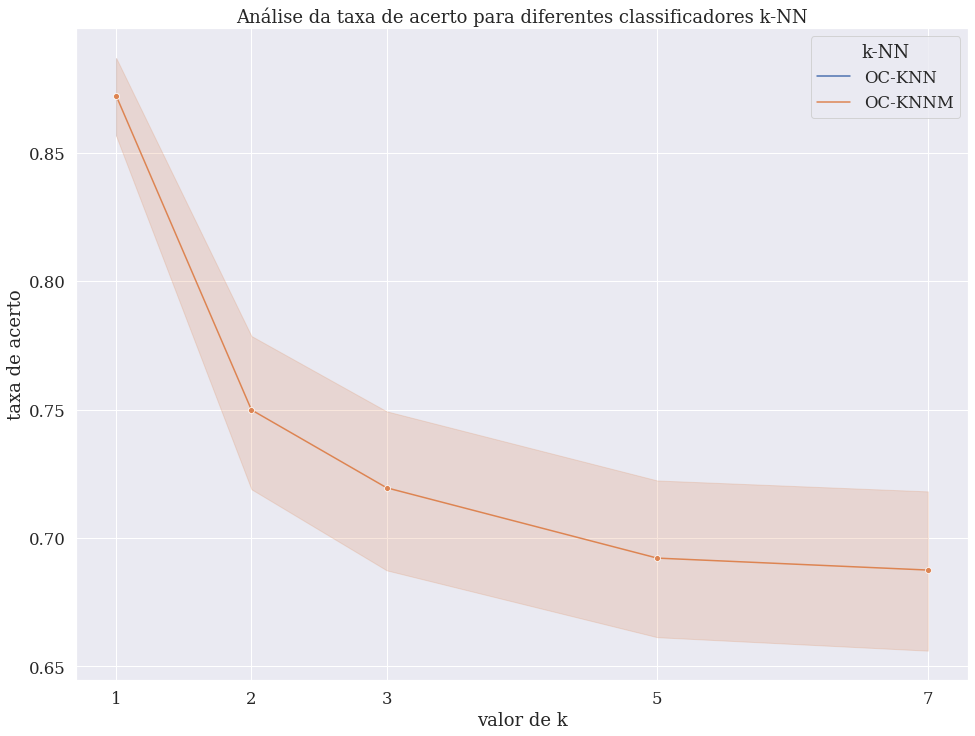

In [37]:
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(16,12)})
sns.set_style("darkgrid")
sns.set(font="DeJavu Serif",font_scale=1.5)
g = sns.lineplot(data=df, x="valor de k", y="taxa de acerto",marker='o',hue="k-NN")
g.set_xticks(k_list) # <--- set the ticks first
plt.title('Análise da taxa de acerto para diferentes classificadores k-NN')
plt.grid(True)  #just add this
plt.show()

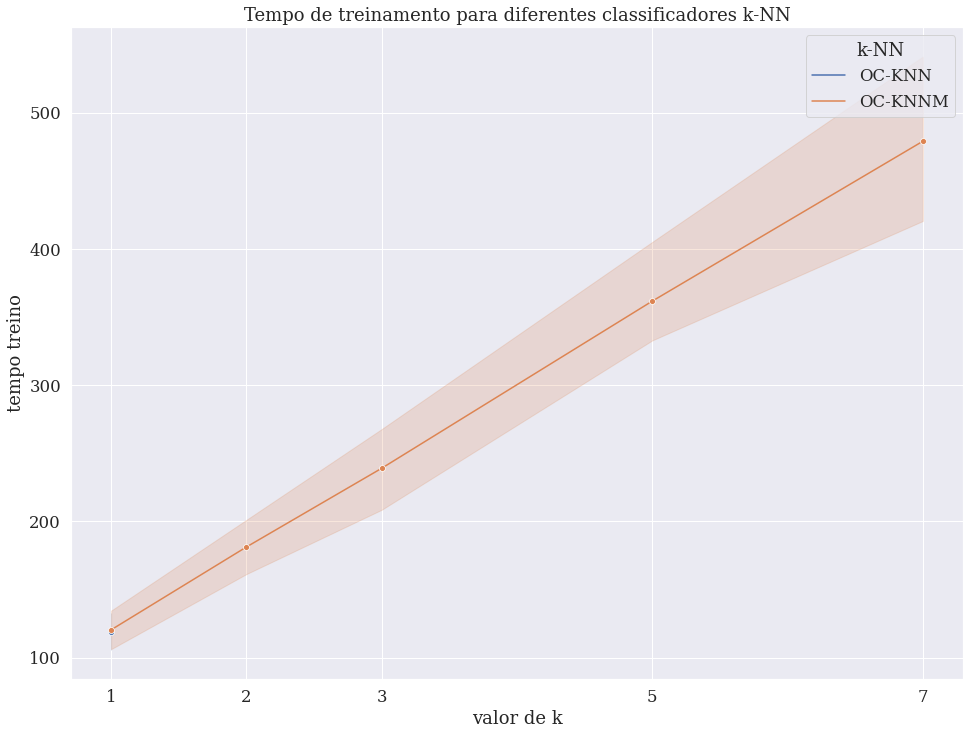

In [38]:
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(16,12)})
sns.set_style("darkgrid")
sns.set(font="DeJavu Serif",font_scale=1.5)
g = sns.lineplot(data=df, x="valor de k", y="tempo treino",marker='o',hue="k-NN")
g.set_xticks(k_list) # <--- set the ticks first
plt.title('Tempo de treinamento para diferentes classificadores k-NN')
plt.grid(True)  #just add this
plt.show()

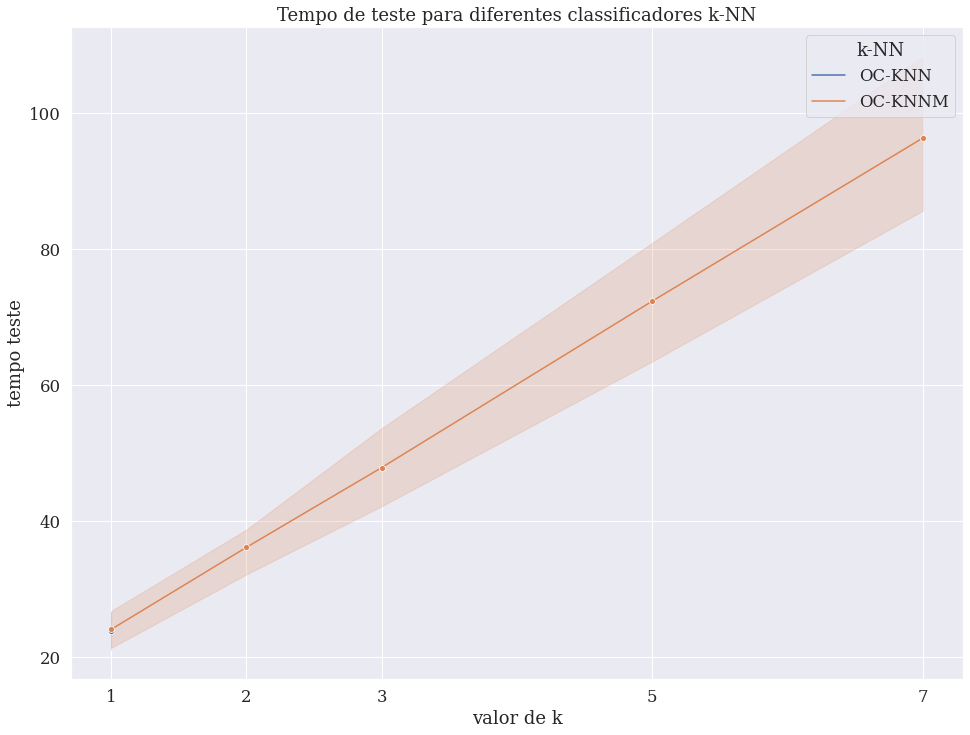

In [39]:
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(16,12)})
sns.set_style("darkgrid")
sns.set(font="DeJavu Serif",font_scale=1.5)
g = sns.lineplot(data=df, x="valor de k", y="tempo teste",marker='o',hue="k-NN")
g.set_xticks(k_list) # <--- set the ticks first
plt.title('Tempo de teste para diferentes classificadores k-NN')
plt.grid(True)  #just add this
plt.show()

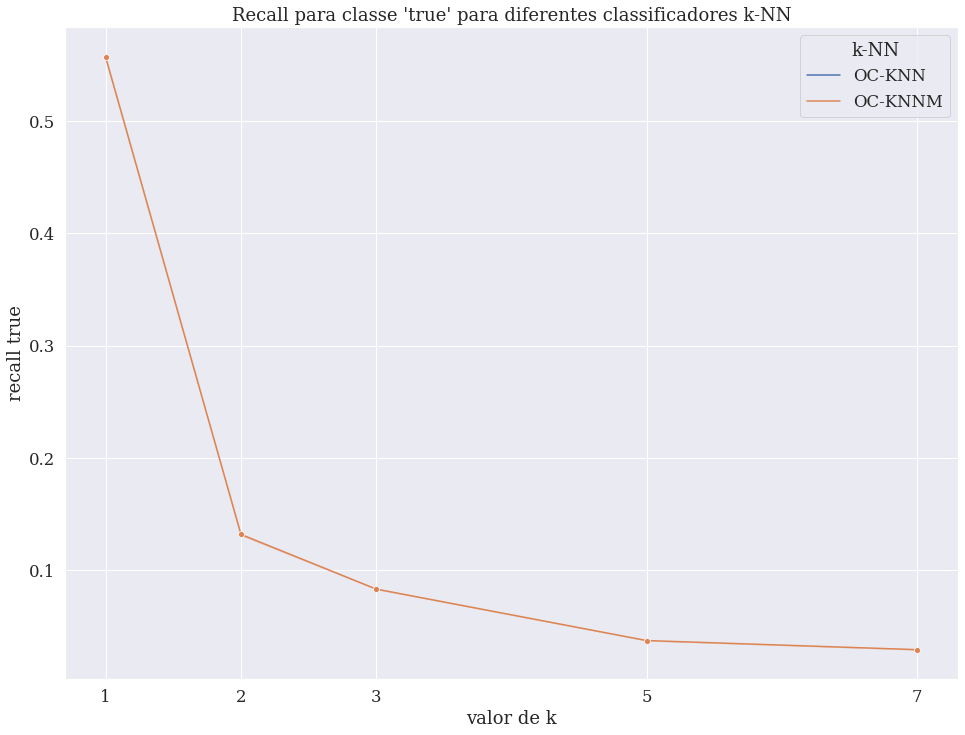

In [40]:
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(16,12)})
sns.set_style("darkgrid")
sns.set(font="DeJavu Serif",font_scale=1.5)
g = sns.lineplot(data=df, x="valor de k", y="recall true",marker='o',hue="k-NN")
g.set_xticks(k_list) # <--- set the ticks first
plt.title("Recall para classe 'true' para diferentes classificadores k-NN")
plt.grid(True)  #just add this
plt.show()

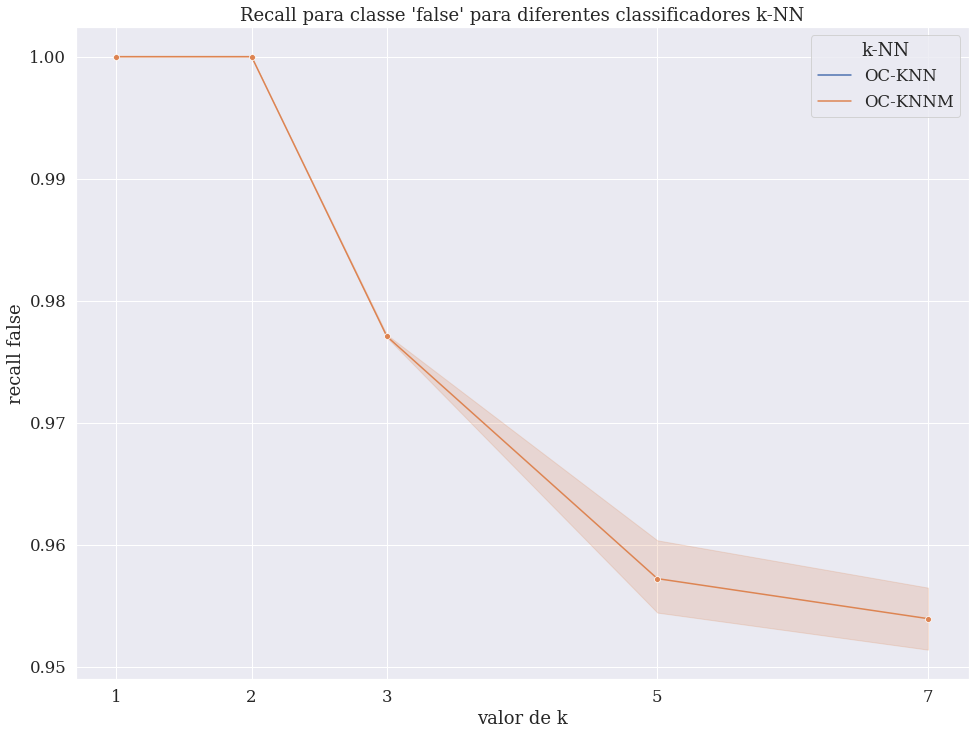

In [41]:
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(16,12)})
sns.set_style("darkgrid")
sns.set(font="DeJavu Serif",font_scale=1.5)
g = sns.lineplot(data=df, x="valor de k", y="recall false",marker='o',hue="k-NN")
g.set_xticks(k_list) # <--- set the ticks first
plt.title("Recall para classe 'false' para diferentes classificadores k-NN")
plt.grid(True)  #just add this
plt.show()

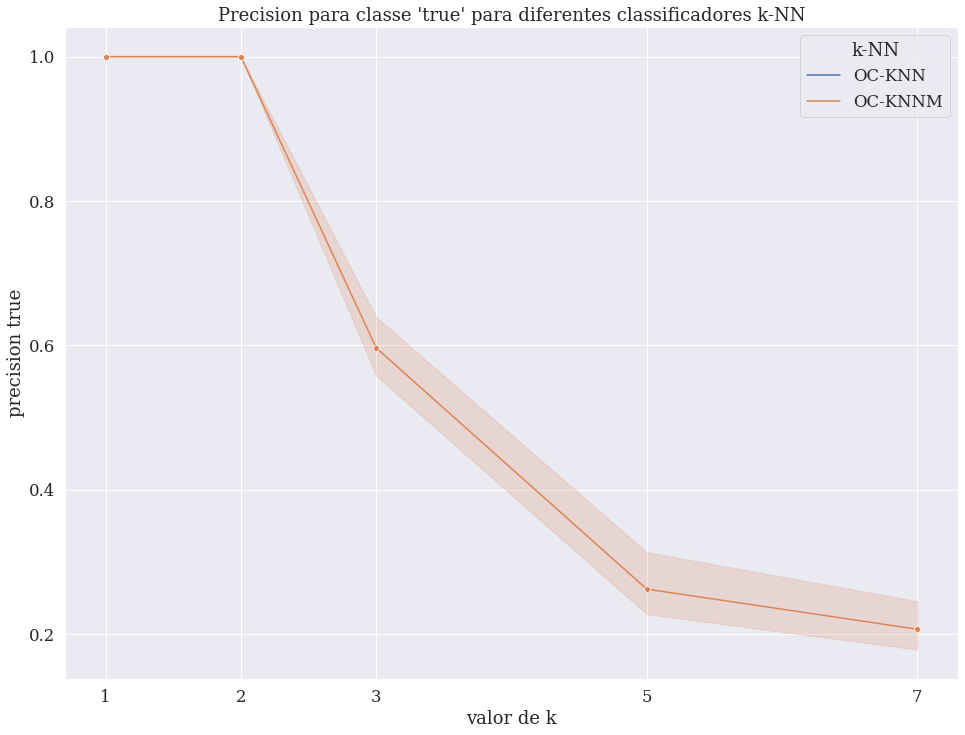

In [42]:
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(16,12)})
sns.set_style("darkgrid")
sns.set(font="DeJavu Serif",font_scale=1.5)
g = sns.lineplot(data=df, x="valor de k", y="precision true",marker='o',hue="k-NN")
g.set_xticks(k_list) # <--- set the ticks first
plt.title("Precision para classe 'true' para diferentes classificadores k-NN")
plt.grid(True)  #just add this
plt.show()

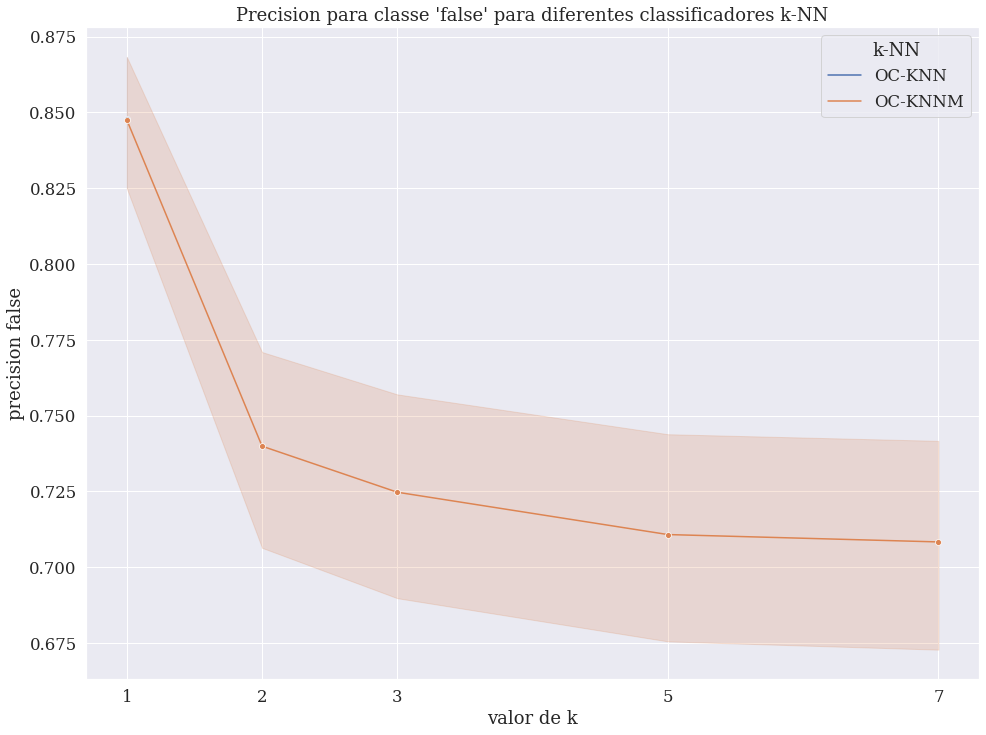

In [43]:
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(16,12)})
sns.set_style("darkgrid")
sns.set(font="DeJavu Serif",font_scale=1.5)
g = sns.lineplot(data=df, x="valor de k", y="precision false",marker='o',hue="k-NN")
g.set_xticks(k_list) # <--- set the ticks first
plt.title("Precision para classe 'false' para diferentes classificadores k-NN")
plt.grid(True)  #just add this
plt.show()